<a href="https://colab.research.google.com/github/tmendonca28/pytorch-trial/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Linear Regression Basics
* Allows us to understand the rship between 2 continuous variables
* A good example is the y = mx+c equation

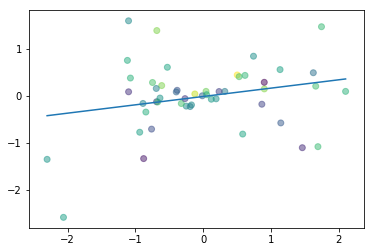

In [45]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
n = 50
x = np.random.randn(n)
y = x * np.random.randn(n)

colors = np.random.randn(n)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()

Aim of linear regression is to minimize the distance between the points and the line.
We can adjust the coefficient and the intercept/bias (m and c respectively)

# Building a Linear Regression Model with PyTorch
* Coeff = 2
* Intercept = 1
* Equation: y = 2x + 1

## Building a Toy Dataset

In [0]:
# making a list from 0 - 10
x_values = [i for i in range(11)]

In [47]:
# Converting to numpy array
x_train = np.array(x_values, dtype=np.float32)
x_train.shape

(11,)

In [48]:
# IMPORTANT: 2D is required
x_train = x_train.reshape(-1, 1)
x_train.shape

(11, 1)

y = 2x + 1

In [49]:
y_values = [2*i+1 for i in x_values]
y_values

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [50]:
# Converting to numpy
y_train = np.array(y_values, dtype=np.float32)
y_train = y_train.reshape(-1, 1)
y_train.shape

(11, 1)

# Building Model

In [0]:
import torch
import torch.nn as nn
from torch.autograd import Variable

**Create Model**


1.   Linear model
  * True equation: y = 2x+1
2.   Forward
  * Input x and output new y



In [0]:
# Create class
class LinearRegressionModel (nn.Module):
  def __init__ (self, input_size, output_size):
    super(LinearRegressionModel, self).__init__()
    self.linear = nn.Linear(input_size, output_size)
    
  def forward(self, x):
    out = self.linear(x)
    return out

In [0]:
# Instantiate Model class
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)

In [0]:
# Instantiate Loss class (p-t)
criterion = nn.MSELoss()

In [0]:
# Instantiate Optimizer class
# parameters = parameters - learning_rate * parameters_gradients
learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [56]:
# 1 epoch means going through the whole train data once
epochs = 100

for epoch in range(epochs):
  epoch +=1
  # Convert numpy array to torch variable
  inputs = Variable(torch.from_numpy(x_train))
  labels = Variable(torch.from_numpy(y_train))
  
  # Clear gradients w.r.t parameters
  optimizer.zero_grad()
  
  # Pass it through the forward to get outputs
  outputs = model(inputs)
  
  # Calculate loss
  loss = criterion(outputs, labels)
  
  # Getting gradients w.r.t parameters
  loss.backward()
  
  # Updating parameters
  optimizer.step()
  
  print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 1, loss 264.0016174316406
epoch 2, loss 21.606067657470703
epoch 3, loss 1.8338279724121094
epoch 4, loss 0.22026962041854858
epoch 5, loss 0.08786775171756744
epoch 6, loss 0.07628728449344635
epoch 7, loss 0.07457096129655838
epoch 8, loss 0.07366766035556793
epoch 9, loss 0.07283923029899597
epoch 10, loss 0.07202542573213577
epoch 11, loss 0.0712210088968277
epoch 12, loss 0.07042593508958817
epoch 13, loss 0.0696394145488739
epoch 14, loss 0.06886174529790878
epoch 15, loss 0.06809274852275848
epoch 16, loss 0.06733240187168121
epoch 17, loss 0.06658049672842026
epoch 18, loss 0.06583699584007263
epoch 19, loss 0.06510186195373535
epoch 20, loss 0.06437480449676514
epoch 21, loss 0.06365600973367691
epoch 22, loss 0.06294512748718262
epoch 23, loss 0.06224219501018524
epoch 24, loss 0.06154720485210419
epoch 25, loss 0.060859858989715576
epoch 26, loss 0.060180243104696274
epoch 27, loss 0.05950825288891792
epoch 28, loss 0.05884378030896187
epoch 29, loss 0.0581866763532161